# Predicting Inflation rates using Linear Regression Model
## Ibrahim shedoh
## 9/19/2024

In [1]:
# importing neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Loading the data set

In [2]:
# loading data
df=pd.read_csv('inflation data.csv')
# head of dataset
df.head()

,YEARS,ANNUAL GDP GROWTH RATES(%),AVARAGE ANNUAL EXCHANGE RATES (KSHS vs USD),ANNUAL CPI RATES(%),ANNUAL INTEREST(LENDING) RATES(%),ANNUAL INFLATION RATES (%)
0,1971.0,22.17,7.14,0.93,9.0,3.78
1,1972.0,17.08,7.14,0.98,9.0,5.83
2,1973.0,5.90,7.00,1.07,9.0,9.28
3,1974.0,4.07,7.14,1.26,9.5,17.81
4,1975.0,0.88,7.34,1.50,10.0,19.12


# 2) Understanding the dateset

In [3]:
# tail of the dataset
df.tail()

,YEARS,ANNUAL GDP GROWTH RATES(%),AVARAGE ANNUAL EXCHANGE RATES (KSHS vs USD),ANNUAL CPI RATES(%),ANNUAL INTEREST(LENDING) RATES(%),ANNUAL INFLATION RATES (%)
49,2020.0,-0.27,106.45,200.23,12.00,5.40
50,2021.0,7.59,109.64,212.47,12.08,6.11
51,2022.0,4.85,117.87,228.74,12.34,7.66
52,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# dropping last 2 rows since they are nan values
df.drop([52,53], inplace=True)

In [5]:
# renaming column name
df.rename(columns={df.columns[1]:'Growth_Rates', df.columns[2]:'Exchange_Rates',df.columns[3]:'CPI_Rates',df.columns[4]:'Lending_rates',df.columns[5]:'Inflation_rates'}, inplace=True)

In [6]:
df.head(2)

,YEARS,Growth_Rates,Exchange_Rates,CPI_Rates,Lending_rates,Inflation_rates
0,1971.0,22.17,7.14,0.93,9.0,3.78
1,1972.0,17.08,7.14,0.98,9.0,5.83


In [7]:
# stracture of the dataframe
df.shape

(52, 6)

In [8]:
# data types of each column
df.dtypes

YEARS              float64
Growth_Rates       float64
Exchange_Rates     float64
CPI_Rates          float64
Lending_rates      float64
Inflation_rates    float64
dtype: object

In [9]:
# column names 
df.columns

Index(['YEARS', 'Growth_Rates', 'Exchange_Rates', 'CPI_Rates', 'Lending_rates',
       'Inflation_rates'],
      dtype='object')

In [10]:
#describe the numeric columns of the dataset 
df.describe()

,YEARS,Growth_Rates,Exchange_Rates,CPI_Rates,Lending_rates,Inflation_rates
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1996.500000,4.599423,52.343654,57.376538,16.301923,11.505962
std,15.154757,3.875853,36.625405,67.618047,6.524063,7.880084
min,1971.000000,-0.800000,7.000000,0.930000,9.000000,1.550000
25%,1983.750000,2.270000,14.135000,4.472500,12.400000,6.252500
50%,1996.500000,4.255000,58.365000,29.125000,14.395000,9.790000
75%,2009.250000,5.902500,79.185000,97.142500,18.525000,13.900000
max,2022.000000,22.170000,117.870000,228.740000,36.240000,45.980000


In [11]:
# more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEARS            52 non-null     float64
 1   Growth_Rates     52 non-null     float64
 2   Exchange_Rates   52 non-null     float64
 3   CPI_Rates        52 non-null     float64
 4   Lending_rates    52 non-null     float64
 5   Inflation_rates  52 non-null     float64
dtypes: float64(6)
memory usage: 2.6 KB


In [12]:
# checking missing value
df.isnull().sum()

YEARS              0
Growth_Rates       0
Exchange_Rates     0
CPI_Rates          0
Lending_rates      0
Inflation_rates    0
dtype: int64

## Data Visualization 

array([[<Axes: title={'center': 'YEARS'}>,
        <Axes: title={'center': 'Growth_Rates'}>],
       [<Axes: title={'center': 'Exchange_Rates'}>,
        <Axes: title={'center': 'CPI_Rates'}>],
       [<Axes: title={'center': 'Lending_rates'}>,
        <Axes: title={'center': 'Inflation_rates'}>]], dtype=object)

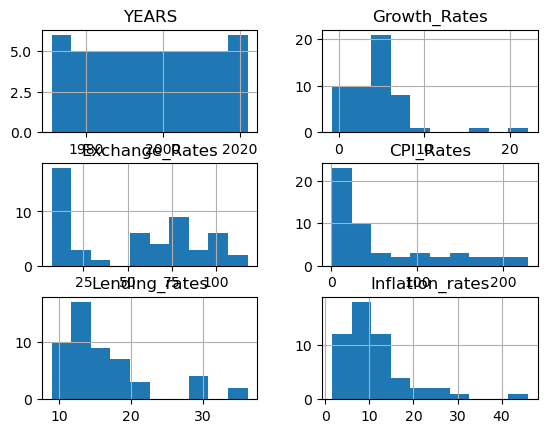

In [13]:
# histogram
df.hist()

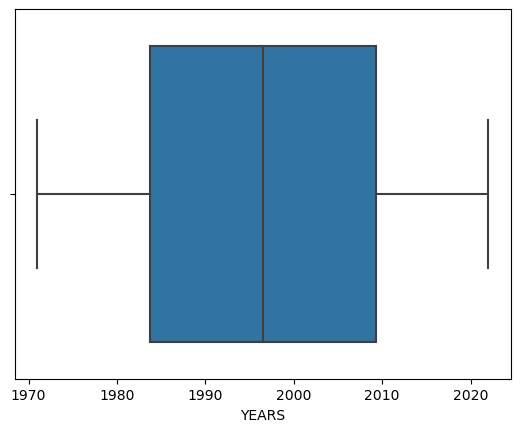

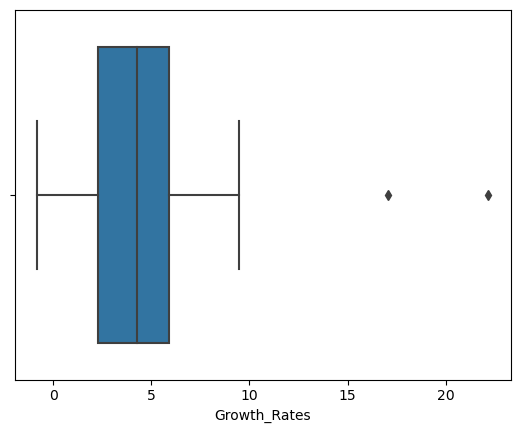

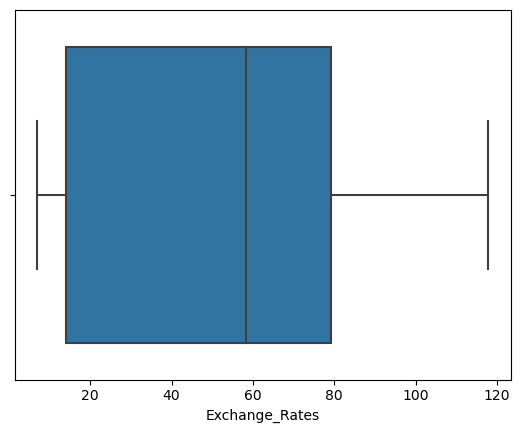

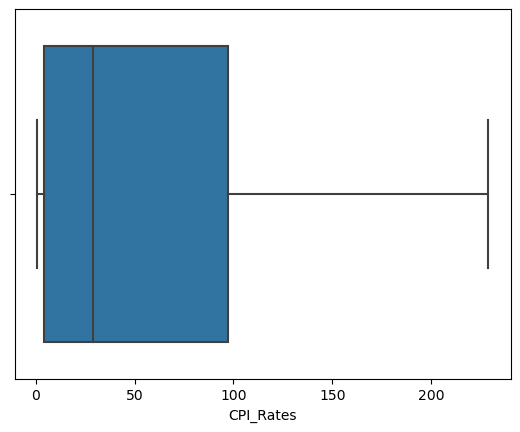

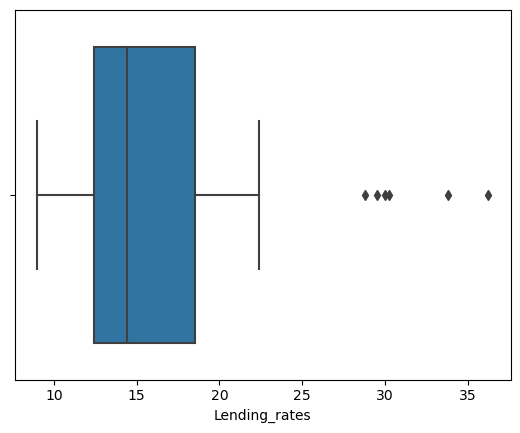

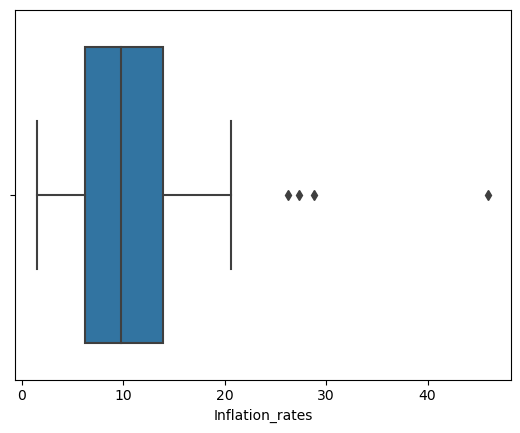

In [14]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

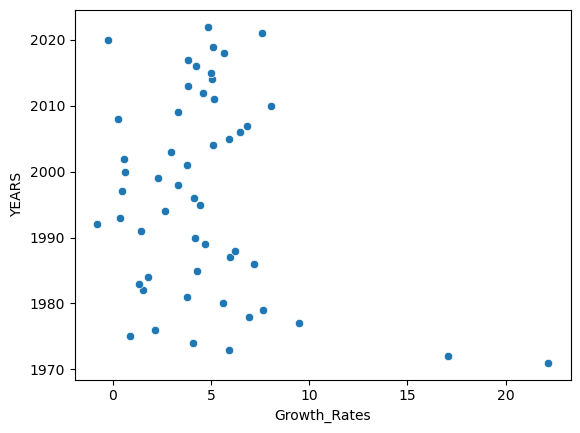

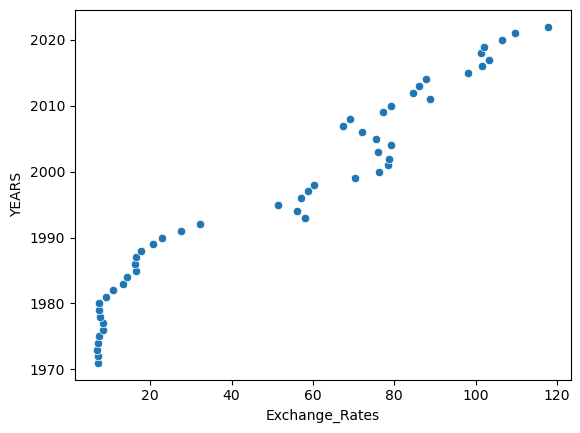

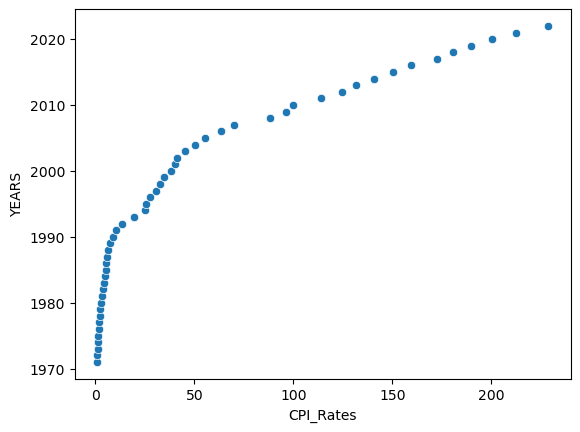

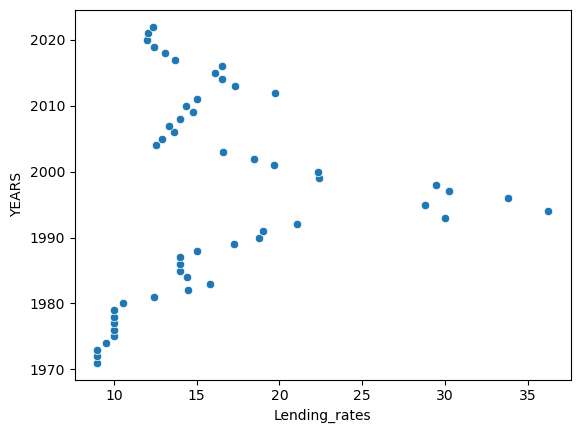

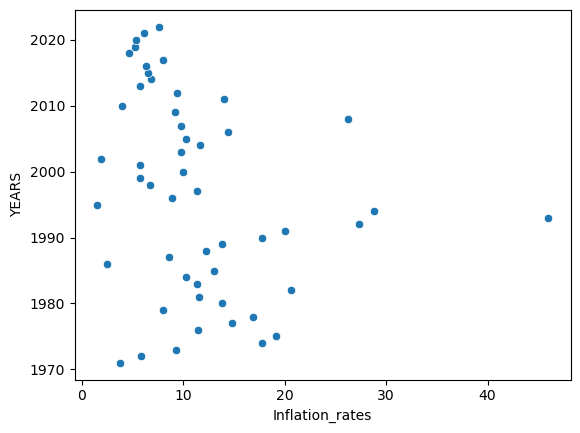

In [15]:
for i in [ 'Growth_Rates', 'Exchange_Rates', 'CPI_Rates', 'Lending_rates',
       'Inflation_rates']:
    sns.scatterplot(data=df, x=i, y='YEARS')
    plt.show()

# 3) Linear regression Model

In [16]:
# selecting feature and target value
y=df[['Inflation_rates']] # target variable
X=df[['CPI_Rates']]  # feature

In [17]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# create the model
model = LinearRegression()

In [19]:
# train the model 
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# make prediction  
y_pred = model.predict(X_test)

In [21]:
# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (m) : {slope}")
print(f"Intercept (b) : {intercept}")

Slope (m) : [-0.03664801]
Intercept (b) : [13.73220784]


In [22]:
# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 6.543854007001165
R^2 Score: 0.597044466002621


In [ ]:
# Get input from the user
# Convert to float for consistency
CPI_Rates = float(input("Enter the CPI: "))

# Create a dictionary with input values

input_data = {
    'CPI_Rates': [CPI_Rates]
}

# Convert the dictionary to a DataFrame and then access the values
input_df = pd.DataFrame.from_dict(input_data)

# Predict using the model
y=13.732207843798992+(-0.03664800543070505*CPI_Rates)
print("The annual inflation rate is : ",y)